#[Problem 1] Confirmation of competition contents

##What to learn and what to predict?
it is possible to learn the transactional information and we can predict clients repayment abilities.
##What kind of file to create and submit to Kaggle?
Well most of the time is used csv file to create and submit , in this file includs SK_ID_CURR,TARGET
##What kind of index value will be used to evaluate the submissions?
The index value used to evaluate submissions is ROC (Receiver operating characteristic)

In [ ]:
#[Problem 2] Learning and verification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df1=pd.read_csv('application_train.csv')

x=df1[['SK_ID_CURR','NAME_CONTRACT_TYPE','CODE_GENDER','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']]
y=df1['TARGET'].values
print('describe',x.describe())
print('infor',x.info)
x = pd.get_dummies(x, columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER'])


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train = x_train.fillna(0)
x_test = x_test.fillna(0)


model=LogisticRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print('roc_auc_score',roc_auc_score(y_test,y_pred))

describe           SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY
count  307511.000000      3.075110e+05  3.075110e+05  307499.000000
mean   278180.518577      1.687979e+05  5.990260e+05   27108.573909
std    102790.175348      2.371231e+05  4.024908e+05   14493.737315
min    100002.000000      2.565000e+04  4.500000e+04    1615.500000
25%    189145.500000      1.125000e+05  2.700000e+05   16524.000000
50%    278202.000000      1.471500e+05  5.135310e+05   24903.000000
75%    367142.500000      2.025000e+05  8.086500e+05   34596.000000
max    456255.000000      1.170000e+08  4.050000e+06  258025.500000
infor <bound method DataFrame.info of         SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER  AMT_INCOME_TOTAL  \
0           100002         Cash loans           M          202500.0   
1           100003         Cash loans           F          270000.0   
2           100004    Revolving loans           M           67500.0   
3           100006         Cash loans           F        

In [ ]:
#[Problem 3] Estimation on test data
import pandas as pd
from sklearn.preprocessing import StandardScaler

df2 = pd.read_csv('application_test.csv')

cols_usadas = ['SK_ID_CURR','NAME_CONTRACT_TYPE','CODE_GENDER','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']
x_test = df2[cols_usadas].copy()

x_test = x_test.fillna(x_test.median(numeric_only=True))

x_test = pd.get_dummies(x_test)

x_train = pd.get_dummies(df1[cols_usadas])
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test)

pred_prob = model.predict(x_test_scaled)
submission = pd.DataFrame({
    'SK_ID_CURR': x_test['SK_ID_CURR'],
    'TARGET':pred_prob
})

submission.to_csv('submission.csv', index=False)
print("File submission.csv created!")

File submission.csv created!


kangle link: https://www.kaggle.com/code/cindyzacarias/16-credit-information-learning

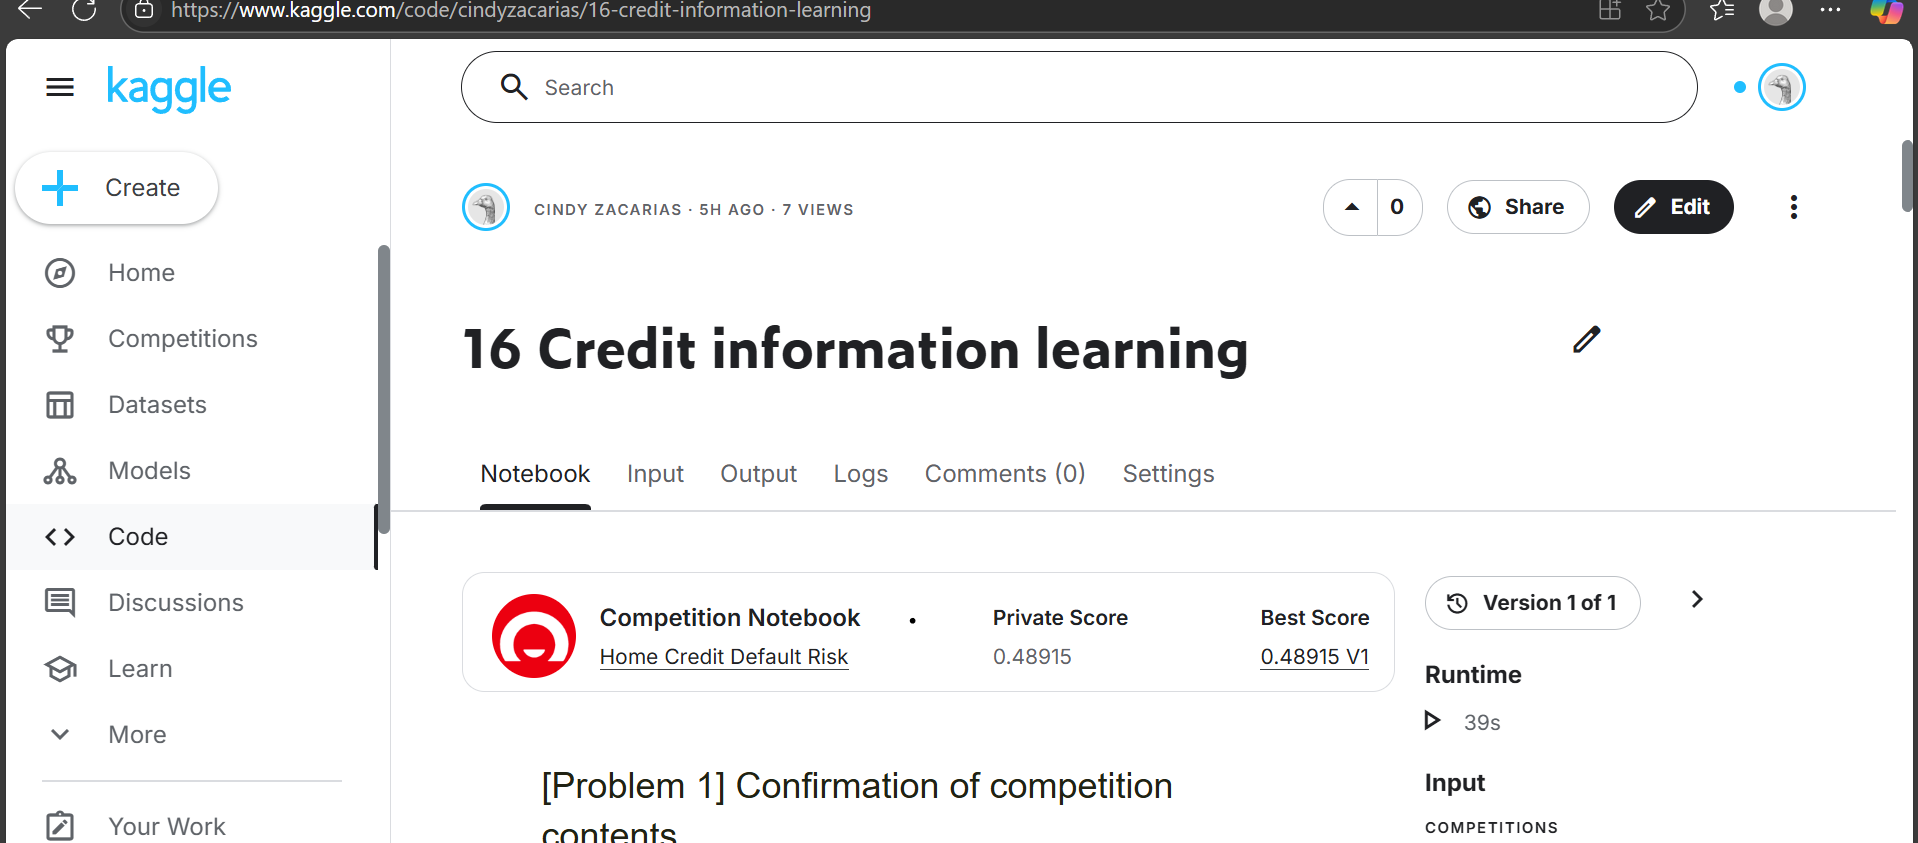

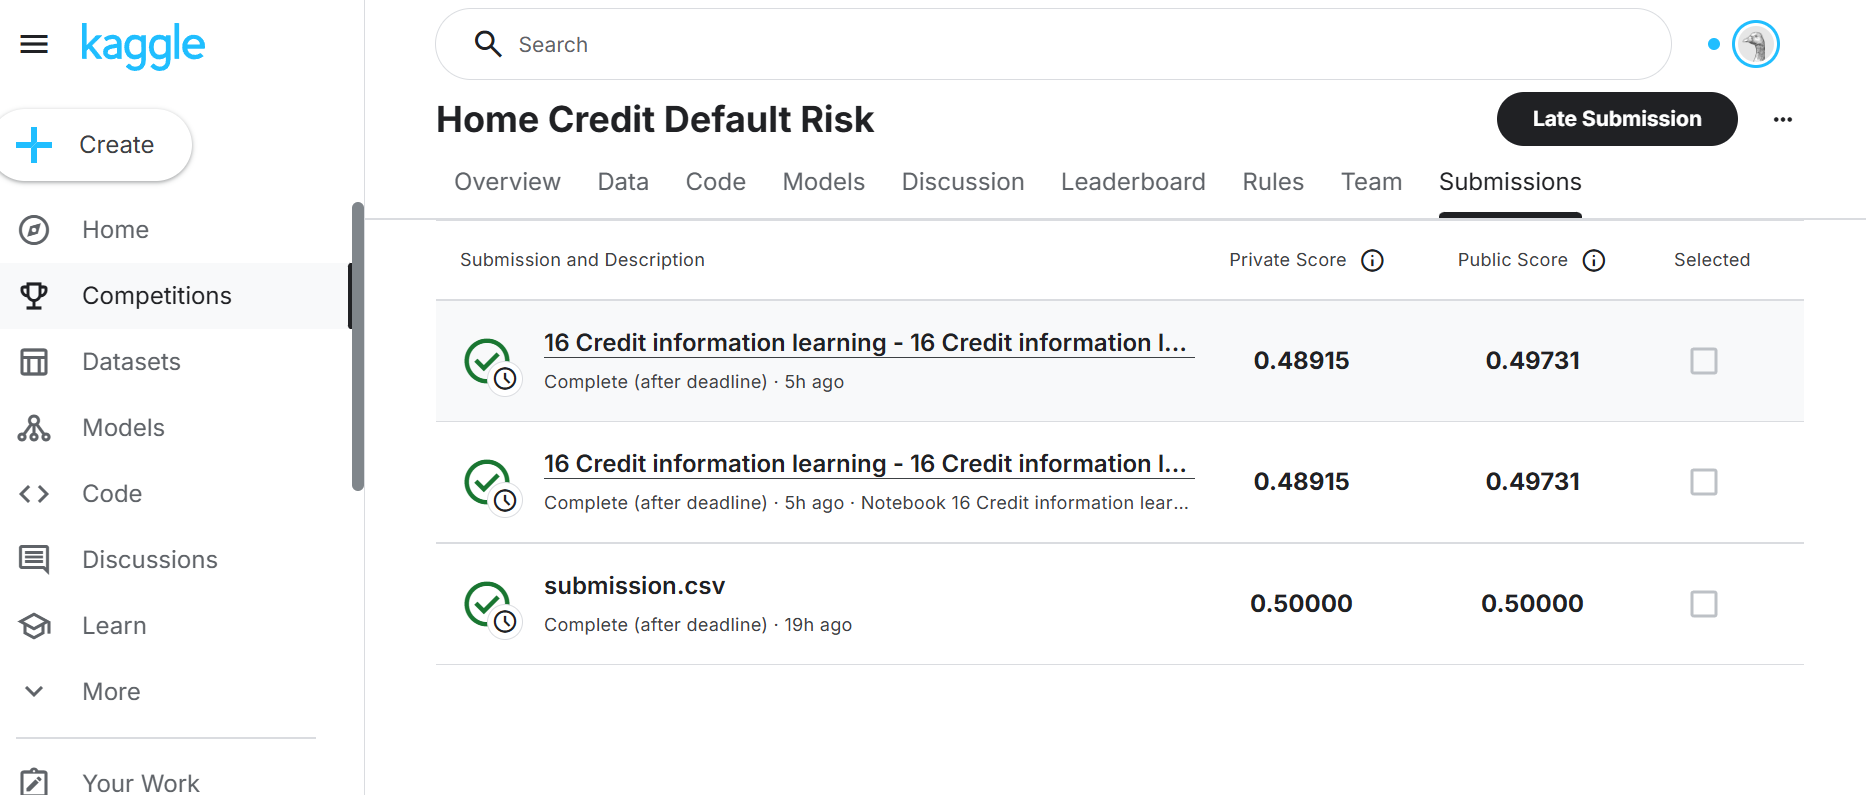

#[Problem 4] Feature engineering
##Which feature to use?
I used some feature like this :'SK_ID_CURR','NAME_CONTRACT_TYPE','CODE_GENDER','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'
##How to preprocess?
- Convert categorical to number
- Scale numeric values





#What I Did:
- Selected different sets of features for the model, from simple numeric features to adding new features and categorical data.
- Encoded categorical features into numbers so the model can use them.
- Scaled features (standardized) in some patterns to help the model learn better.
- Trained a logistic regression model on each set of features
- Evaluated the model on validation data using the ROC AUC score, which measures how well the model separates defaults from non-defaults

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load data
train = pd.read_csv('application_train.csv')

train['CREDIT_INCOME_RATIO'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']

def run_pattern(features):
    X = train[features].fillna(0)  # Fill missing with 0
    y = train['TARGET']

    # Encode categorical features as numbers (simple)
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = pd.factorize(X[col])[0]

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predict and evaluate
    preds = model.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, preds)
    return auc

# Define 5 feature sets (patterns)
patterns = [
    ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH'],
    ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'CREDIT_INCOME_RATIO'],
    ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'NAME_CONTRACT_TYPE'],
    ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'NAME_CONTRACT_TYPE', 'CODE_GENDER'],
    ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CREDIT_INCOME_RATIO']
]

for i, feats in enumerate(patterns, 1):
    auc = run_pattern(feats)
    print(f'Pattern {i} - Features: {feats} - Validation AUC: {auc:.4f}')


Pattern 1 - Features: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH'] - Validation AUC: 0.5924
Pattern 2 - Features: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'CREDIT_INCOME_RATIO'] - Validation AUC: 0.5924
Pattern 3 - Features: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'NAME_CONTRACT_TYPE'] - Validation AUC: 0.5924
Pattern 4 - Features: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_BIRTH', 'NAME_CONTRACT_TYPE', 'CODE_GENDER'] - Validation AUC: 0.6117
Pattern 5 - Features: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CREDIT_INCOME_RATIO'] - Validation AUC: 0.5193
